In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
income = pd.read_csv("income_shares.csv")
income_d = pd.DataFrame(income)
df = income_d.rename(columns = {"Share of Aggregate Income Received by Each Fifth and Top 5 Percent of All Households: 1967 to 2019": "year","Unnamed: 1": "#households", "Unnamed: 2": "fifth","Unnamed: 3": "fourth","Unnamed: 4": "third","Unnamed: 5": "second","Unnamed: 6": "first","Unnamed: 7": "top5"})
df = df.drop([0,54,55])
float(df.iloc[0]['fifth'])


3.1

[0.2468,
 0.2472,
 0.2452,
 0.2456,
 0.2452,
 0.2448,
 0.2408,
 0.2424,
 0.2415999999999999,
 0.23440000000000008,
 0.23240000000000008,
 0.2316,
 0.2292,
 0.2352,
 0.2336,
 0.2304000000000001,
 0.2288000000000001,
 0.22639999999999982,
 0.2312,
 0.2248,
 0.2236,
 0.2216,
 0.2224,
 0.2204,
 0.2168,
 0.222,
 0.2192,
 0.2028,
 0.2,
 0.2012,
 0.2031999999999999,
 0.1996000000000002,
 0.198,
 0.1956,
 0.1932,
 0.1884,
 0.1876,
 0.186,
 0.1804,
 0.1772,
 0.1796,
 0.1772,
 0.1764,
 0.1728,
 0.1716,
 0.1696,
 0.174,
 0.176,
 0.1708,
 0.1672,
 0.1656,
 0.1608,
 0.1716]

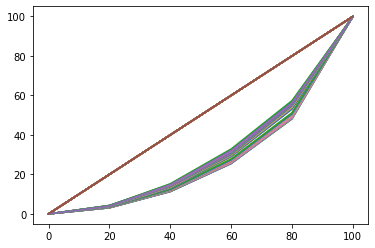

In [85]:
x = [0,20,40,60,80,100]
y = []
gini_coef = []
equality_points = []
for i in range(0,120,20):
    equality_points.append(i)

for i in range(0,53):
    
    y.append(0)
    one = float(df.iloc[i]['fifth'])
    y.append(one)
    two = one + float(df.iloc[i]['fourth'])
    y.append(two)
    three = two + float(df.iloc[i]['third'])
    y.append(three)
    four = three + float(df.iloc[i]['second'])
    y.append(four)
    five = four + float(df.iloc[i]['first'])
    y.append(five)
    
    plt.plot(x,y)
    plt.plot(x, equality_points)
    
    a_plus_b = 0.5 * 100 * 100
    width = 20
    area_b = width * (one + two + three + four + five)
    area_a = a_plus_b - area_b
    gini_coef.append(area_a/a_plus_b)
    
    y = []

    
gini_coef

In [91]:
len(gini_coef)


53

<AxesSubplot:xlabel='Year'>

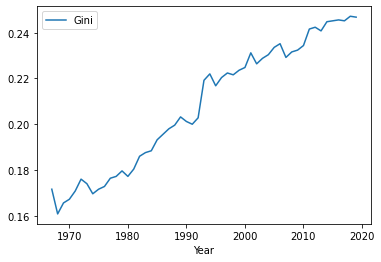

In [112]:
year = []
for i in range(1967,2020):
    year.append(i)

gini = []
for i in range(len(gini_coef)-1,-1,-1):
    gini.append(gini_coef[i])

data = {"Year" : year,"Gini":gini}
df = pd.DataFrame(data)
df = df.set_index('Year')
df.plot()